In [1]:
# 공공 데이터 포탈에서 다운받은 '소상공인시장진흥공단_상가(상권)정보_대구_202312.csv'을 사용.
# 1. [상권업종중분류명]이 '부동산 서비스'인 데이터만 따로 데이터프레임으로 생성. -> df1
# 2. df1에서 
# 상가업소번호, 상호명, 상권업종대분류명, 상권업종중분류명, 상권업종소분류명, 시도명, 시군구명, 법정동명만 남기고 나머지 컬럼은 삭제 -> df2
# 
# 3. seaborn의 countplot()을 이용해서 각 구별 상점수를 그래프 출력.
# 
# 4. seaborn의 barplot()을 이용해서 수성구의 상점수를 각 동별로  그래프 출력 (상점수가 많은 동 순서로 정렬).
# 
# 5. matplotlib의 pie()를 이용해서 수성구의 상점수를 각 동별로  그래프 출력. (몇 퍼센트인지 나오도록)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib

In [3]:
df = pd.read_csv('./input/소상공인시장진흥공단_상가(상권)정보_20231231/소상공인시장진흥공단_상가(상권)정보_대구_202312.csv')
df1 = df[df['상권업종중분류명'] == '부동산 서비스']
df1.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
9,MA010120220805439984,부경부동산중개,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,2726010100100410009019659,NaN,대구광역시 수성구 상록로 8,706817,42019,NaN,2,NaN,128.624191,35.860022
20,MA010120220805449536,SB공인중개사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,2729011200103710014017531,NaN,대구광역시 달서구 와룡로53길 19,704932,42631,NaN,3,NaN,128.536144,35.856653
26,MA010120220805458266,달성매일공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,2771025328108030059040554,NaN,대구광역시 달성군 논공읍 논공로9길 78,711857,42979,NaN,NaN,NaN,128.443665,35.730121
50,MA010120220805478608,유진기획,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,2720010300121510004013110,NaN,대구광역시 남구 양지로 102,705816,42455,NaN,NaN,NaN,128.579396,35.851396
61,MA010120220805489131,365대박부동산공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,2714010200102600005026861,NaN,대구광역시 동구 동부로16길 68,701826,41258,NaN,1,NaN,128.621821,35.872752


In [4]:
print(type(df1))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# df2 = df1.drop(
#     ['지점명', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '표준산업분류코드', '표준산업분류명', '시도코드', '시군구코드', '행정동코드', '행정동명', '법정동코드',
#      '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지', '건물부번지', '건물관리번호', '건물명', '도로명주소',
#      '구우편번호', '신우편번호', '동정보', '층정보',
#      '호정보', '경도', '위도'], axis=1)
df2 = df1[['상가업소번호', '상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '법정동명']]
df2.head()

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,법정동명
9,MA010120220805439984,부경부동산중개,부동산,부동산 서비스,부동산 중개/대리업,대구광역시,수성구,범어동
20,MA010120220805449536,SB공인중개사무소,부동산,부동산 서비스,부동산 중개/대리업,대구광역시,달서구,죽전동
26,MA010120220805458266,달성매일공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,대구광역시,달성군,논공읍
50,MA010120220805478608,유진기획,부동산,부동산 서비스,부동산 중개/대리업,대구광역시,남구,대명동
61,MA010120220805489131,365대박부동산공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,대구광역시,동구,신천동


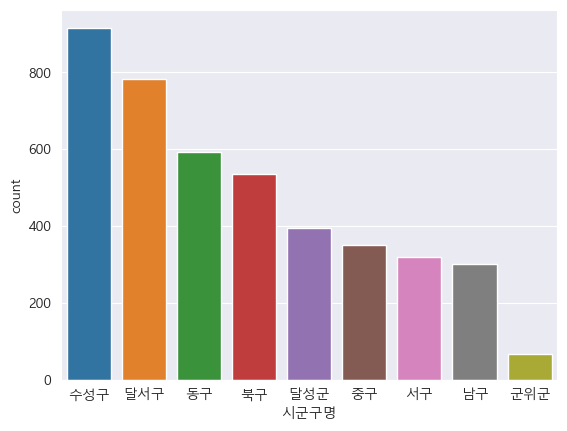

In [6]:
# # 3. seaborn의 countplot()을 이용해서 각 구별 상점수를 그래프 출력.
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕으로 지정
matplotlib.rcParams['axes.unicode_minus'] = False
sns.countplot(data=df2, x='시군구명', order=df2['시군구명'].value_counts().index)
plt.show()

In [7]:
df2.columns

Index(['상가업소번호', '상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명',
       '법정동명'],
      dtype='object')

In [8]:
df3 = df2[df2['시군구명'] == '수성구']
df3.head()

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,법정동명
9,MA010120220805439984,부경부동산중개,부동산,부동산 서비스,부동산 중개/대리업,대구광역시,수성구,범어동
71,MA010120220805502085,LBA한영공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,대구광역시,수성구,만촌동
273,MA010120220806257434,제이에셋,부동산,부동산 서비스,부동산 중개/대리업,대구광역시,수성구,범어동
317,MA010120220806347959,지엠파트너,부동산,부동산 서비스,부동산 중개/대리업,대구광역시,수성구,지산동
374,MA010120220806416370,백수정공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,대구광역시,수성구,수성동3가


In [9]:
# 4. seaborn의 barplot()을 이용해서 수성구의 상점수를 각 동별로  그래프 출력 (상점수가 많은 동 순서로 정렬).
df4 = df3.groupby('법정동명', as_index=False).agg(n=('법정동명', 'count'))
df4

,법정동명,n
0,가천동,1
1,대흥동,10
2,두산동,65
3,만촌동,103
4,매호동,21
5,범물동,23
6,범어동,256
7,사월동,11
8,상동,55
9,성동,1


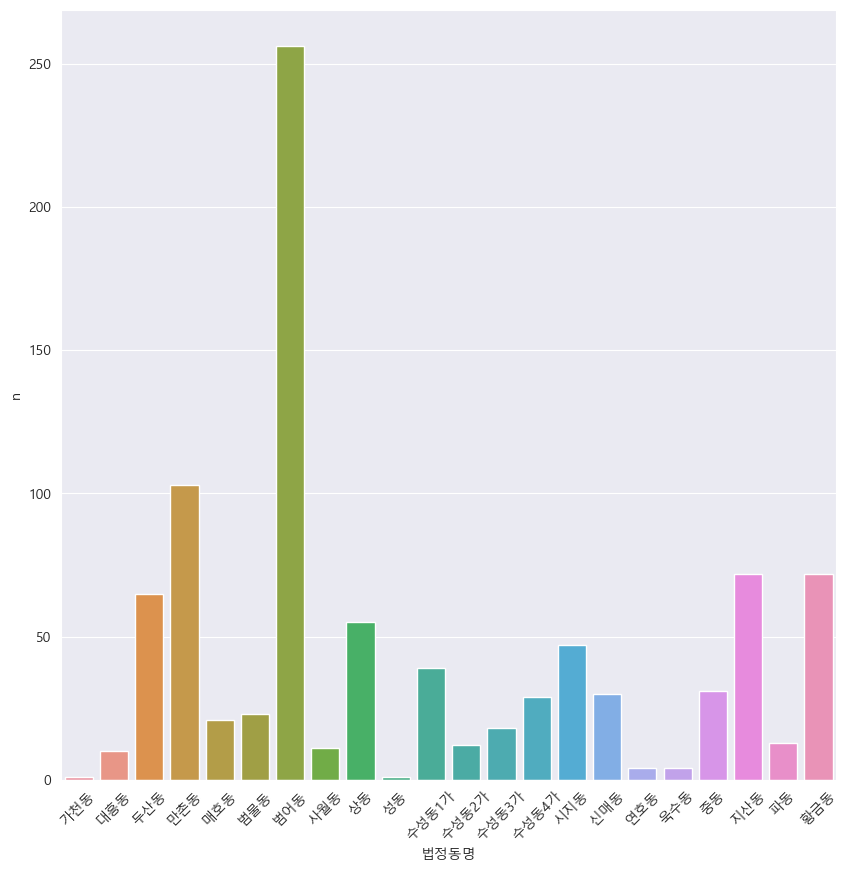

In [10]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=45)  # x 축의 라벨을 회전
sns.barplot(data=df4, x='법정동명', y='n')
plt.show()

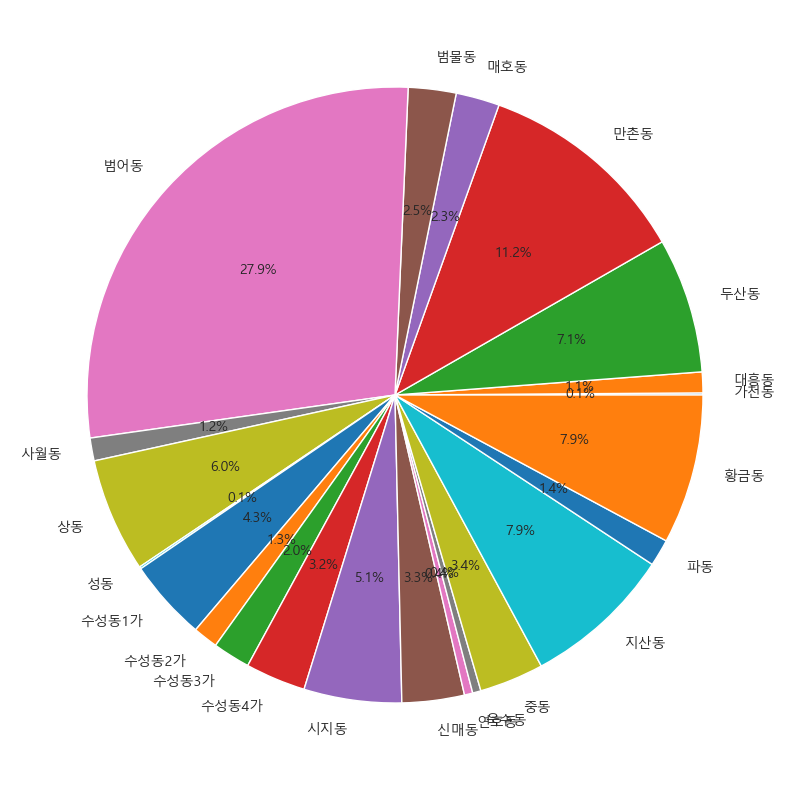

In [11]:
# 5. matplotlib의 pie()를 이용해서 수성구의 상점수를 각 동별로  그래프 출력. (몇 퍼센트인지 나오도록)

plt.figure(figsize=(10, 10))
plt.pie(df4['n'], labels=df4['법정동명'], autopct='%.1f%%')
plt.show()